In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Skyserver.csv')
data.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

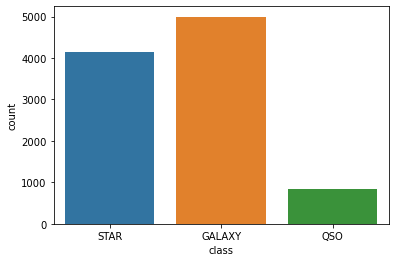

In [7]:
data['class'].head(10)
ax = sns.countplot(x='class',data=data)

The most objects (50%) are galaxies, a little less (40%) are stars and only around (10%) of the rows are classified as QSOs.

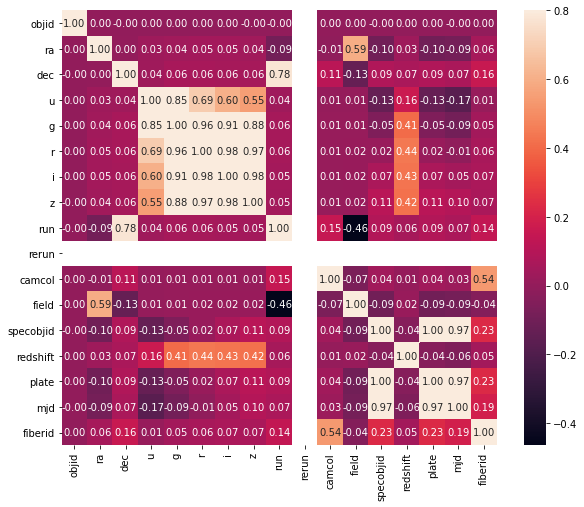

In [8]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

we clearly see that  our variables like objid, run, rerun, camcol, field and specobjid  we should remove they are unnecessary features

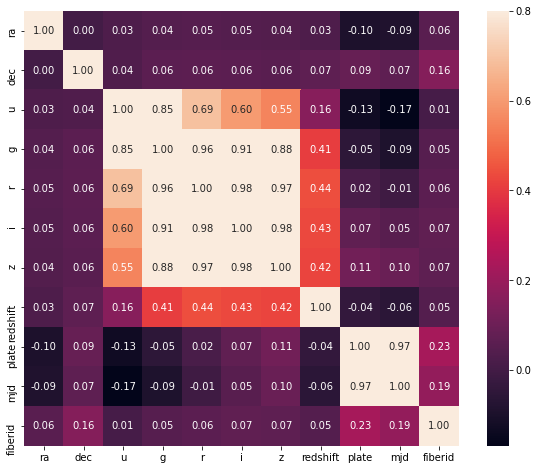

In [9]:
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 , annot=True,square=True,fmt=".2f")

Now it look good we later also analysis some of the features

In [10]:
data.describe()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,8410.000000,57481.000000,1000.000000


# Univariate Analysis

# Redshift

To start the univariate analysis we will plot histograms for the 'redshift' feature column for each class.

This will tell us how the redshift values are distributed over their range.

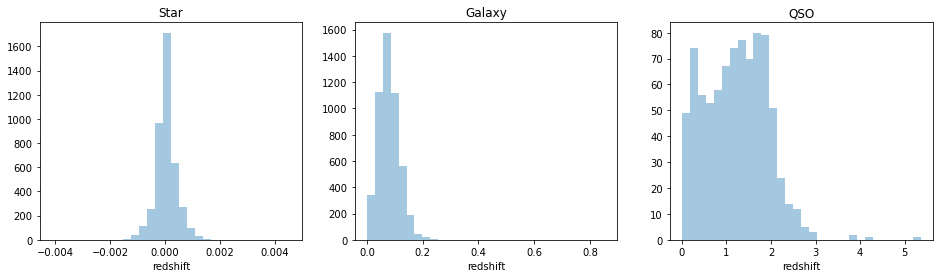

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(data[data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

We can cleary tell that the redshift values for the classes quite differ.

Star: The histogram looks like a truncated zero-centered normal distribution.

Galaxy: The redshift values may come from a slightly right-shifted normal distribution which is centered around 0.075.

QSO: The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers.

C:\Users\babita rai\anaconda3\lib\site-packages\seaborn\categorical.py:2613: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


Text(0.5, 1.0, 'dec')

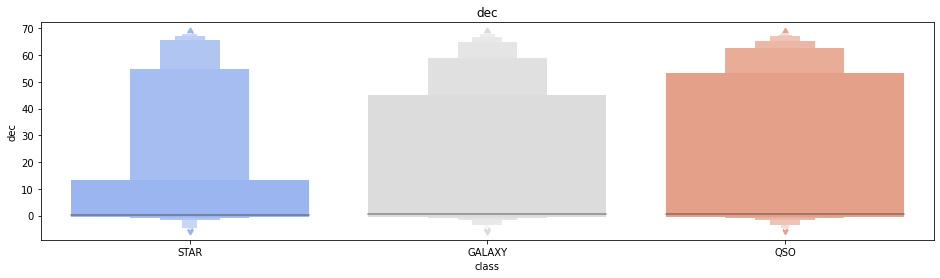

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.lvplot(x=data['class'], y=data['dec'], palette='coolwarm')
ax.set_title('dec')

The Letter value (LV) Plot show us an estimate of the distribution of the data. It shows boxes which relate to the amount of values within the range of values inside the box.


In this case we can observe a clear distinction between Stars and the other two classes. The difference between Galaxies and Quasars is smaller.

Star: The largest part of the data points lay within a 0 to 10 range. Another large part consists of values between about 10 to 55. Only small amounts of the data are lower or higher than these ranges.

Galaxy: The largest part of values lays between 0 and 45. There is a smaller amount of values in the range of 45 to 60. The rest of the data has smaller or higher values.

QSO: This plot looks quite similiar to the GALAXY plot. Only the amount of data points in the range of 0 to 60 is even bigger.

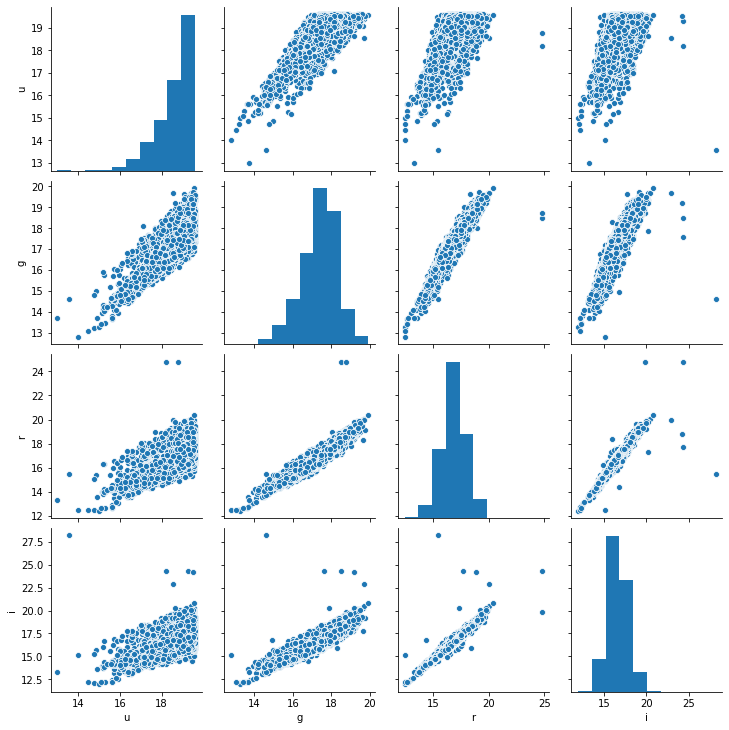

In [13]:
sns.pairplot(data[['u','g','r','i','class']])

C:\Users\babita rai\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial coordinates')

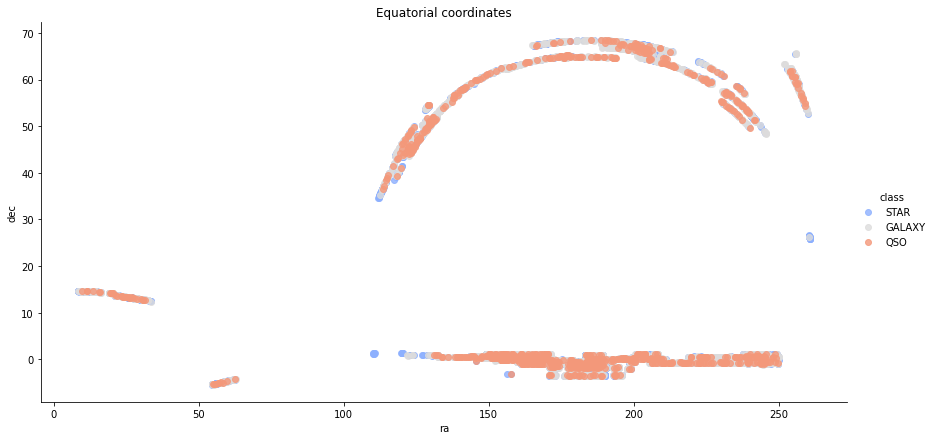

In [14]:
sns.lmplot(x='ra', y='dec', data=data, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')


As we can clearly observe the equatorial coordinates do not differ significantly between the 3 classes. There are some outliers for stars and galaxies but for the bigger part the coordinates are within the same range.

# Skewness

In [15]:
data.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [16]:
data['dec'] = np.cbrt(data['dec'])
data['redshift']= np.cbrt(data['redshift'])

data['plate']= np.log1p(data['plate'])

data['mjd']= np.log1p(data['mjd'])

In [17]:
data.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

# Outliers

In [18]:
numerical= data.select_dtypes(include =[np.float64,np.int64])

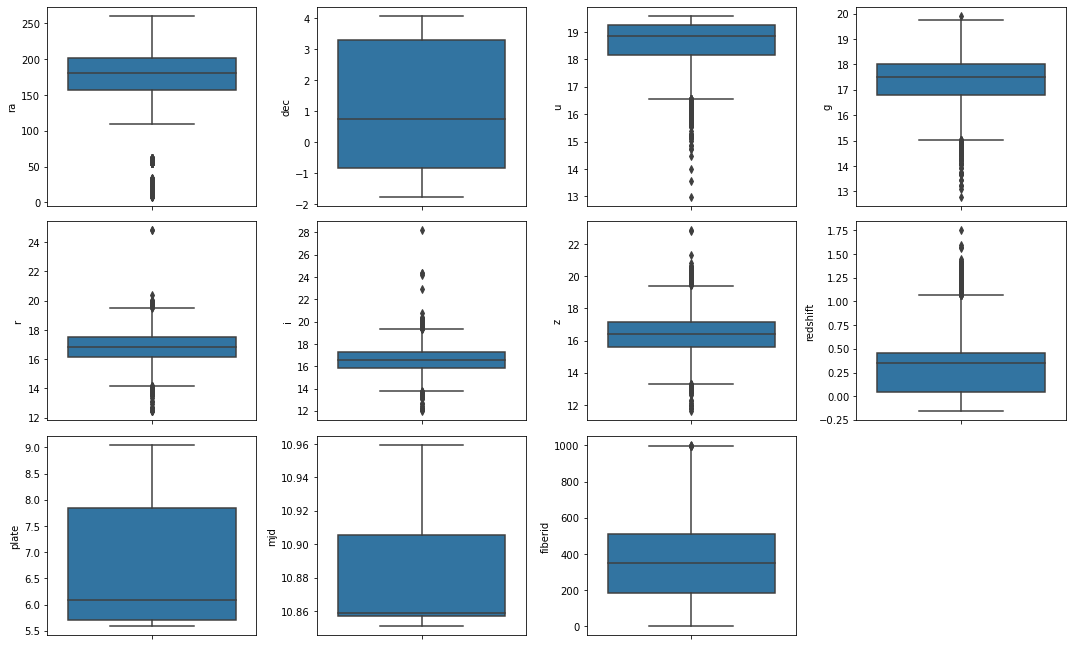

In [19]:
fig = plt.figure(figsize=(15,15))
for i in range(len(numerical.columns)):
    fig.add_subplot(5,4,i+1)
    sns.boxplot(y=numerical.iloc[:,i])

plt.tight_layout()
plt.show()

some of the features are have the outliers data point we can remove using Z- score

My medium blog about outliers treatment - https://vivekrai1011.medium.com/all-about-outlier-detction-techniques-4e7a803bd6

In [20]:
data_FE = data
from sklearn.preprocessing import LabelEncoder
# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(data_FE['class'])
data_FE['class'] = y_encoded


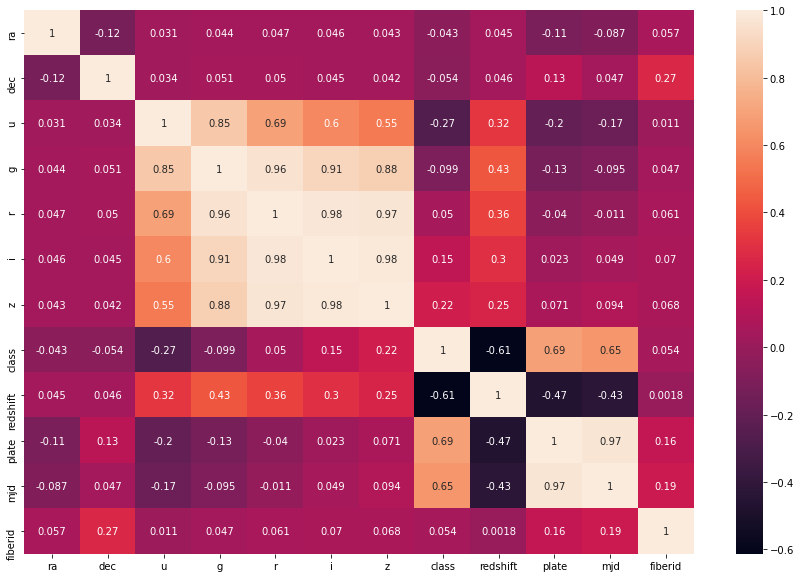

In [21]:
plt.figure(figsize=(15,10))
p=sns.heatmap(data_FE.corr(), annot=True) 

We draw this correlation result on the bar plot to get better understanding

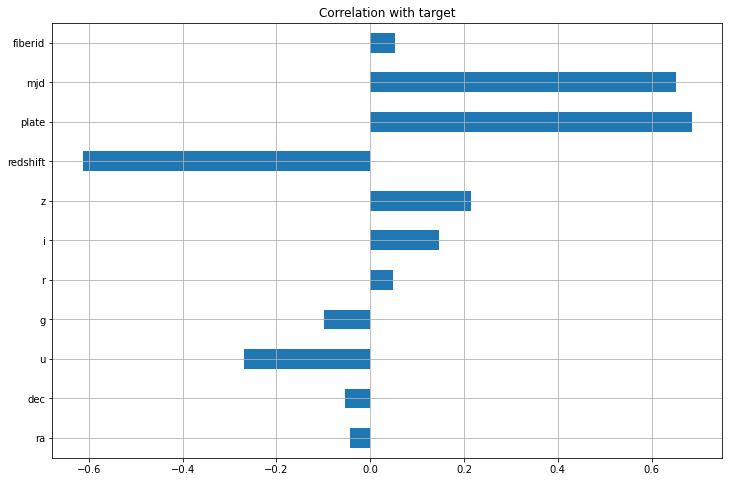

In [22]:
data_FE.drop('class', axis=1).corrwith(data_FE['class']).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

Here we clearly see that redshift is very high negatively correlated with our target(class) variables

mjd and plate are positively correlated with target(class) variables

Remaining variables are not play a good role for our model prediction because they are very less correlated with target(class) variables

In [23]:
data_FE.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.447630,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.020770,8.103797,10.913687,491
1,183.598371,0.513354,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.038006,5.780744,10.851587,541
2,183.680207,0.501575,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.497469,5.662960,10.859460,513
3,183.870529,0.368184,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.048003,8.103797,10.913687,510
4,183.883288,0.468081,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.083889,8.103797,10.913687,512


In [24]:
data_FE.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [25]:
# remove outliers

from scipy.stats import zscore
z_score=np.abs(zscore(data_FE))
data_FE = data_FE[(z_score<3).all(axis=1)]

In [26]:
data_FE.isna().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [27]:
X=data_FE.drop(['class'],axis=1)
y=data_FE['class']

In [28]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))


Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 97.88


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

preds = gnb.predict(X_test)

acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))


Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 97.13


In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


XGBoost's prediction accuracy is: 99.21


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))


Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.00


In [34]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

preds = svc.predict(X_test)

acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100

print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))


Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 98.89


In [35]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,99.210621
Random Forest,98.995335
SVC,98.887693
KNN,97.883028
Naive Bayes,97.129530


XGBoost is the best model

In [36]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99539171 0.99384615 0.98769231 0.98769231 0.98307692 0.98307692
 0.98769231 0.98923077 0.99076923 0.99538462]
Mean: 0.9893853243530664
Standard Deviation: 0.004267281989403793


In [37]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99539171 0.99538462 0.98769231 0.99230769 0.98615385 0.98307692
 0.98461538 0.99076923 0.99076923 0.99230769]
Mean: 0.9898468628146049
Standard Deviation: 0.0040829621117776955


In [38]:
importances = pd.DataFrame({
    'Feature': data_FE.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances


,Importance
Feature,
redshift,0.909117
u,0.016817
g,0.011060
r,0.010772
i,0.010041
plate,0.008726
dec,0.008575
z,0.006769
fiberid,0.006632


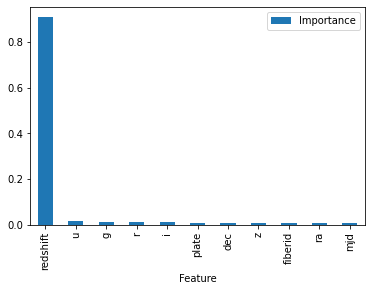

In [39]:
importances.plot.bar()

In [40]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99538816 0.99       0.98461538 0.98923077 0.99307692]
Mean: 0.9904622479749305
Standard Deviation: 0.003661070566896124


In [41]:
from sklearn.model_selection import GridSearchCV

def hyperParameterTuning(X_train, y_train):
    
    param_tuning={
        'max_depth': [2, 3, 5, 7, 10],
        'n_estimators': [10, 100,500],
        'learning_rate': [0.01, 0.1],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7,0.8],
        'colsample_bytree': [0.5, 0.7],
        
    }
    
    xgb_model = XGBClassifier()
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
    gsearch.fit(X_train,y_train)
    return gsearch.best_params_
      

In [42]:
#hyperParameterTuning(X_train, y_train)

In [43]:
# {'colsample_bytree': 0.7,
# 'learning_rate': 0.1,
# 'max_depth': 2,
# 'min_child_weight': 1,
# 'n_estimators': 500,
# 'subsample': 0.8}

We put all this code in a comments because we get our best parameters and every time we run our model it takes lots of time to execute so we first find best parametrs to run first time and put comments symbol to avoid to run next time

In [44]:
xgboost = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=500,  
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.7)

xgboost.fit(X_train, y_train)
preds = xgboost.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 99.21


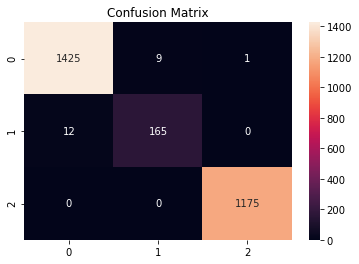

In [45]:
from sklearn.metrics import confusion_matrix
M_confusao = confusion_matrix(y_test,preds)

# Confusion matrix plot
ax= plt.subplot()
sns.heatmap(M_confusao, annot=True, ax = ax, annot_kws={"size": 10},fmt=".0f");
ax.set_title('Confusion Matrix'); 
plt.grid(False)

In [46]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, preds) 
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1435
           1       0.95      0.93      0.94       177
           2       1.00      1.00      1.00      1175

    accuracy                           0.99      2787
   macro avg       0.98      0.98      0.98      2787
weighted avg       0.99      0.99      0.99      2787



In [47]:
import joblib
joblib.dump(xgboost, 'Space_Server_pkl')

['Space_Server_pkl']